# 14 モンテカルロ法

ここでは**モンテカルロ法**について学びます。モンテカルロ法は乱数を用いて確率的に数値計算を行う方法の総称です。（解析的に解けない）積分計算、物理現象、金融現象、生物現象、統計的推測に至るまで綺麗な数学が及ばない諸現象に幅広く用いられている手法であり、計算機能力向上とともにその有用性が認識されてきました。

## 14.1 乱数の発生と使い方

Pythonでは疑似乱数を生成する方法はいくつか存在し、
- **randomモジュール**
- **numpy.randomモジュール**
- **scipy.statsモジュール**
  
などが存在します。最も高機能なものは`scipy.stats`モジュールですが、ここでは比較的使いやすい`numpy.random`モジュールを使います。

In [135]:
import numpy as np

# 乱数のseed（種）の設定
# np.random.seed(1) # NumPy ver 1.6までの定義方法
rng = np.random.default_rng(10)

# 範囲[0, 1)の一様分布から1つ乱数を生成する。
# print(np.random.rand()) # NumPy ver 1.6までの定義方法
print(rng.random())
print(rng.random())

0.9560017096289753
0.20768181007914688


乱数をnumpy.array(Numpy配列)の形で出力することもできます。

In [146]:
import numpy as np

# 乱数のseed（種）の設定
# np.random.seed(1) # NumPy ver 1.6までの定義方法
rng = np.random.default_rng(1)

# 範囲[0, 1)の一様分布から乱数配列（Numpy配列）を生成する。
# print(np.random.rand(10)) # NumPy ver 1.6までの定義方法
print(rng.random(size=10))
# 多次元配列として出力することも可能
# print(np.random.rand(2,3)) # NumPy ver 1.6までの使い方
print(rng.random(size=(2,3)))

[0.51182162 0.9504637  0.14415961 0.94864945 0.31183145 0.42332645
 0.82770259 0.40919914 0.54959369 0.02755911]
[[0.75351311 0.53814331 0.32973172]
 [0.7884287  0.30319483 0.45349789]]


### 乱数のseed（種）の設定

コンピュータ内において乱数とはあくまで**疑似乱数**です。要するに乱数を計算する式に基づいて乱数を出力しているのです。その際、乱数を計算する式に初期値を決める必要があります。典型的な例は**線形合同法**と呼ばれる下記の式に従う疑似乱数発生方法です。  

$$
x_{i+1}=ax_i+b \hspace{1cm}\pmod{m}, \hspace{1cm} 0\leq x_i <m
$$

$a,b,m$は整数であり、$x_0$をユーザーが決めるとこの式に従い乱数が生成される仕組みです。もちろん、上手に$a,b,m$を設定することが重要であり、それにより疑似乱数の周期が決まります。上式の$x_0$のようにユーザー側で設定する必要がある初期値のことを**乱数の種（seed）** と言います。乱数を使う場合には必ずseedを設定することを忘れないで下さい。`numpy.random`においてseedを設定するには下記のように`np.random.default_rng()`(旧：`random.seed()`メソッド)を用います。引数にseedを設定します。seedとしてはintもしくはnumpy配列（intの値）が使えます。~~詳しくは[`numpy.random.seed`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html#numpy.random.seed)を参照してください。~~  

モンテカルロ法では初期値を数多く取り繰り返し計算機実験を実行することになります。そこで、下記では`for`ループ共に乱数を使う典型的な例を載せてます。

In [144]:
#乱数をループと共に使う場合のテンプレート

import numpy as np
""" 乱数のseed（種）の設定"""
# np.random.seed(1) # NumPy ver 1.6までの定義方法
rng = np.random.default_rng(1)

for i in range(10):
    """ループ内での乱数の使用"""
    # print(np.random.rand()) # NumPy ver 1.6までの使い方
    print(rng.random())

0.5118216247002567
0.9504636963259353
0.14415961271963373
0.9486494471372439
0.31183145201048545
0.42332644897257565
0.8277025938204418
0.4091991363691613
0.5495936876730595
0.027559113243068367


異なったサンプルを数多く取りたい場合、下記は典型的なダメな例です。ループ内でseedを設定しているので乱数としてすべて同じ値を出力してしまってます。

In [3]:
import numpy as np

for i in range(10):
    """ループ内での乱数の使用"""
    # np.random.seed(1) # NumPy ver 1.6までの定義方法
    # print(np.random.rand()) # NumPy ver 1.6までの使い方
    rng = np.random.default_rng(1)
    print(rng.random())

0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567
0.5118216247002567


さて、このような一様乱数の確率密度分布をグラフとして出力してみましょう。グラフについてはmatplotlibを用います（情報処理の講義でやった[このページ](http://kino.sub.jp/IT2015_old/IT_06.html)も参考にしてください）。

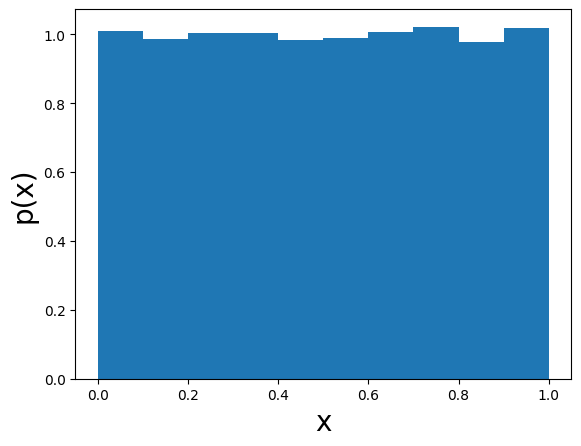

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(1) # NumPy ver 1.6までの定義方法
rng = np.random.default_rng(1)

#生成する乱数のサイズ
size=100000
# uni= np.random.rand(size) # NumPy ver 1.6までの使い方
uni = rng.random(size)

#[0,1)区間の分割数
bins=10
#x軸の範囲を指定
x=(0, 1)
#確率密度の表示形式を指定（density="True"は正規化を表している）
plt.hist(uni, bins, range=x, density="True")
plt.xlabel("x", fontsize="20")
plt.ylabel("p(x)", fontsize="20")

plt.show()

`numpy.random`モジュールでは様々な確率密度関数に従う乱数を生成できます。詳細は[マニュアル（レガシー）](https://numpy.org/doc/2.1/reference/random/legacy.html#distributions) [マニュアル](https://numpy.org/doc/stable/reference/random/generator.html#distributions)を調べて下さい。

## 問題
上記の要領で正規分布に従う乱数の確率分布をグラフで表示せよ。  

$$
\displaystyle{p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}}
$$

正規分布に従う乱数を出力するメソッドは次の通りである。  
`np.random.normal(mu, sigma, size)`（`rng.normal(mu, sigma, size)`）
ここで`mu`は平均$\mu$、`sigma`は標準偏差$\sigma$である。
生成する乱数のサイズは100000、分割数（棒の数）は100とし、$\mu=0$、$\sigma=1$としなさい。

## 14.2 中心極限定理

確率の重要な定理「**中心極限定理**」を視覚化してみましょう。中心極限定理の数学的な表現は次の通り。

（実用的な）中心極限定理

$X_1, X_2, \dots , X_n $を同一の確率分布（ただし，平均$\mu$，分散$\sigma$が有限）に従う独立な確率変数とする．このとき，$X_1, X_2, \dots , X_n $の単純平均，

$$
\displaystyle{S_n=\frac{1}{n}(X_1+X_2+ \dots +X_n)}
$$

に対して

$$
\displaystyle{Z_n=\frac{\sqrt{n}}{\sigma}(S_n-\mu)}
$$

とする．このとき，$Z_n$の確率分布$f_n$は$n \rightarrow \infty$で，

$$
\displaystyle{p(x)=\lim_{n \rightarrow \infty}f_n(x)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Bigl[ -\frac{x^2}{2} \Bigr]}
$$

この定理の意味は「**同一確率分布に従う独立な確率変数の和$S_n$は$n \rightarrow \infty$の極限で正規分布になる**」ということになります。

[]

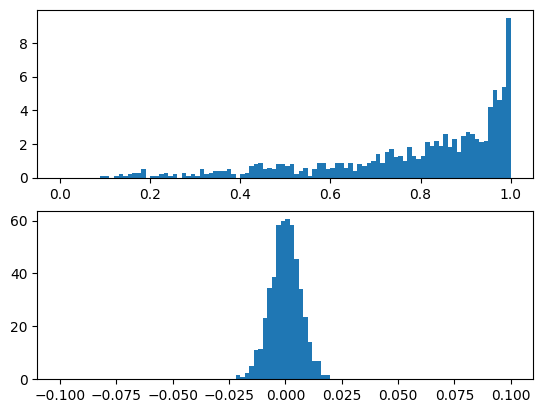

In [5]:
# 中心極限定理
import numpy as np
import scipy.stats as sc_st
import matplotlib.pyplot as plt

sample=1000
n_size=1000
s=np.zeros(sample)

a, b = 2.31, 0.627 #確率分布のパラメータの設定 
#r=sc_st.beta.rvs(a, b, size=n_size)
for k in range(sample):
    rng = np.random.default_rng(k)
    r = rng.beta(a, b, size=n_size)
    # np.random.seed(k) # NumPy ver 1.6までの定義方法
    # r=sc_st.beta.rvs(a, b, size=n_size) # NumPy ver 1.6までの使い方
    s[k]=r.mean()

#sに関する平均
μ=s.mean()

for k in range(sample):
    s[k] = s[k] - μ

fig, ax= plt.subplots(2, 1)
ax[0].hist(r, range=(0, 1), bins=100, density='true')
ax[1].hist(s, range=(-0.1,0.1), bins=100, density='true')
plt.plot()

## 14.3 サイコロの作成

乱数を使ってサイコロ（正6面体）を作ってみましょう。使いまわしできるように下記のように関数化して下さい。

In [7]:
import numpy as np

# def dice(num=6):
#     return int(num*np.random.rand()+1)
def dice(rng, num=6):
    return int(num*rng.random()+1)

if __name__=='__main__':
    # np.random.seed(1)
    rng = np.random.default_rng()
    for i in range(10):
        # print(dice())
        print(dice(rng))

4
3
5
3
5
6
2
1
3
5


### 問題
サイコロを$2^1、2^2、\cdots 2^{10}$回振るシミュレーションを行い、1の目が出る確率を折れ線グラフでプロットしなさい。（X軸：回数、Y軸：確率）

## 14.4 1Dランダムウォーク

それでは**ランダムウォーク**のシミュレーションを行ってみよう。ランダムウォークとはその名の通りランダムに歩き回る運動のことです。有名なランダムウォークとして花粉の中の微粒子が水面上でランダムウォークすることが知られています（ブラウン運動とも言います）。この微粒子の運動はペランが実験を行い観察し理論的な考察はアインシュタインが行いました。ランダムウォークは花粉微粒子の運動、株価の時系列、バクテリアの運動に至るまで様々な現象の基礎的なモデルとして取り扱われます。  


In [26]:
import numpy as np

if __name__=='__main__':
    t=10
    x=0
    rng = np.random.default_rng()
    for i in range(t):
        if int(rng.random()*2)==0:
        # if int(np.random.rand()*2)==0:
            x+=1
        else:
            x-=1
        print(x)

-1
-2
-1
-2
-3
-4
-5
-4
-5
-6


### 1Dランダムウォークの統計的性質

数列だけでは良く分からないので、それでは1Dランダムウォークの動きの時系列をグラフで見てみましょう。

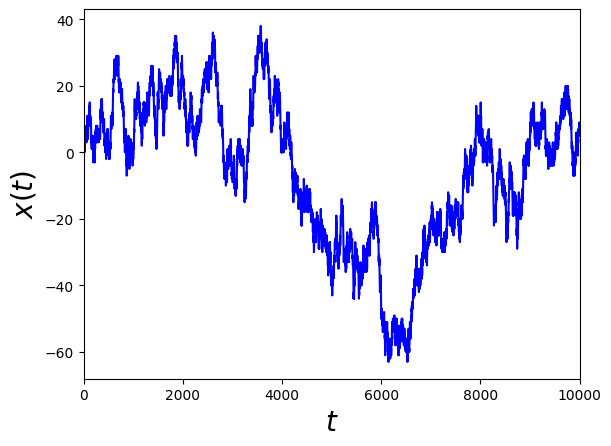

In [28]:
import numpy as np

if __name__=='__main__':
    t=10000
    x=0
    time=[]
    series=[]
    # np.random.seed(1)
    rng = np.random.default_rng()
    for i in range(t):
        if int(rng.random()*2)==0:
        # if int(np.random.rand()*2)==0:
            x+=1
        else:
            x-=1
        time.append(i+1)
        series.append(x)
 
    plt.xlabel("$t$", fontsize="20")
    plt.ylabel("$x(t)$", fontsize="20")
    plt.xlim([0, 10e+3])
    plt.plot(time, series, "-b")
    #print(series)

## 問題
1つのサンプルだけの動きを見ても良く分からないので、サンプル数を増やして時系列を重ね書きします。このとき各サンプルごとにseedを変更することに注意してください（同じ初期値から始めると同じ時系列が生成されることになります）。

上のグラフを見ると1Dランダムウォークはステップ数が大きくなるにつれて原点からの距離$R(t)$が離れていく傾向がありそうです。本当に成り立っているのか調べてみます。

[np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32), np.int64(64), np.int64(128), np.int64(256), np.int64(512), np.int64(1024)]


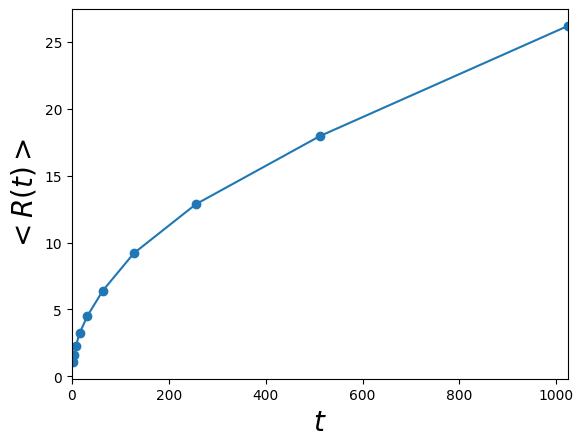

In [27]:
import numpy as np
import matplotlib.pyplot as plt

if __name__=='__main__':
    p_ex=10
    t_max=np.power(2, p_ex)
    sample=1000
    distance=np.zeros((p_ex, sample))

    for j in range(sample):
        x=0
        # np.random.seed(j+1)
        rng = np.random.default_rng(j+1)
        count=1
        for i in range(t_max):
            if int(rng.random()*2)==0:
            # if int(np.random.rand()*2)==0:
                x+=1
            else:
                x-=1
            if i==np.power(2,count)-1:
                distance[count-1][j]=x
                count+=1

    av_dis=[np.average(np.abs(distance[i])) for i in range(0, p_ex)]
    
    x_axis=[np.power(2, i) for i in range(1, p_ex+1)]
    print(x_axis)
    
    plt.plot(x_axis, av_dis, "o-")
    plt.xlabel("$t$", fontsize="20")
    plt.ylabel("$<R(t)>$", fontsize="20")
    plt.xlim([0,1024])
    
    #plt.axis([0, t_max,0,30])
    #plt.xscale("log")
    #plt.yscale("log")
    #print(x_axis)
    #plt.plot(x_axis, y_axis, "-")
    plt.show()
    #print(av_dis)
    

粒子の位置が正の値を持つ時間の割合（全時間に対する）は逆正弦関数となることが知られています．

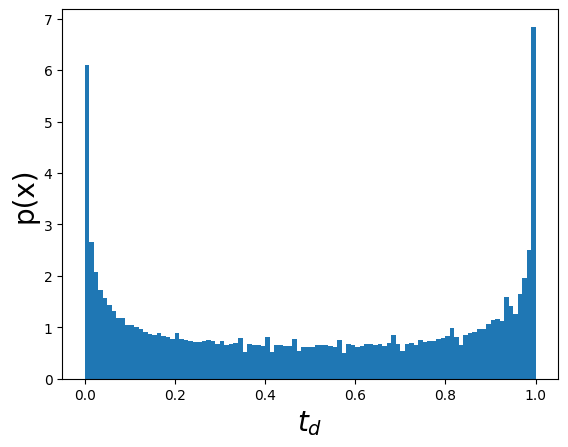

In [29]:
import numpy as np
import matplotlib.pyplot as plt

sample=100000
t_max=1000
dtime=np.zeros(sample)
for i in range(sample):
    # np.random.seed(i)
    rng = np.random.default_rng(i)
    x=[0,0]
    dtime[i]=0
    for t in range(t_max):
        if int(rng.random()*2)==0:
        # if int(np.random.rand()*2)==0:
            x[1]=x[0]+1
        else:
            x[1]=x[0]-1
        if x[0]+x[1]>0:
            dtime[i]+=1
        x[0]=x[1]
    dtime[i]=dtime[i]/(t_max)

#print(dtime)
            
#[0,1)区間の分割数
bins=100
#x軸の範囲を指定
x=(0, 1)
#確率密度の表示形式を指定（density="True"は正規化を表している）
plt.hist(dtime, bins, range=x, density="True")
plt.xlabel("$t_d$", fontsize="20")
plt.ylabel("p(x)", fontsize="20")

plt.show()
    


1Dランダムウォークのアニメーションを作成してみましょう。

In [14]:
import pygame
import numpy as np

if __name__=='__main__':
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GREEN = (0, 255, 0)
    RED = (255, 0, 0)
    
    pygame.init()
    WINDOW_SIZE=(500, 100)
    screen=pygame.display.set_mode(WINDOW_SIZE)
    
    #1次元グリッドの初期化
    row=21
    grid_x=20
    grid_y=20
    grid_x_ini=39
    grid_y_ini=39
        
    x=10 #初期座標
    # np.random.seed(1) #乱数初期化用seed
    rng = np.random.default_rng(1)
    done=False #イベントループ用変数
    while not done:
        for event in pygame.event.get():  # User did something
            if event.type == pygame.QUIT:  # If user clicked close
                done = True  
        screen.fill(WHITE)
        
        if int(rng.random()*2)==0:
        # if int(np.random.rand()*2)==0:
            x+=1
        else:
            x-=1
        
        for i in range(row):
            pygame.draw.rect(screen, BLACK, [grid_x_ini+i*20, grid_y_ini, grid_x, grid_y],1) 
            if i==x:
                pygame.draw.ellipse(screen, RED, [grid_x_ini+i*20, grid_y_ini, grid_x, grid_y])
                
        pygame.display.flip()
        pygame.time.delay(100)
    pygame.quit()
    

pygame 2.1.0 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


境界条件を変えてみます。１反射境界条件２周期境界条件

In [15]:
import pygame
import numpy as np

if __name__=='__main__':
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GREEN = (0, 255, 0)
    RED = (255, 0, 0)
    
    pygame.init()
    WINDOW_SIZE=(500, 100)
    screen=pygame.display.set_mode(WINDOW_SIZE)
    
    #1次元グリッドの初期化
    grid=[]
    row=21
    for i in range(row):
        grid.append(0)
        
    x=10
    # np.random.seed(1) #乱数初期化用seed
    rng = np.random.default_rng(1)
    done=False
    while not done:
        for event in pygame.event.get():  # User did something
            if event.type == pygame.QUIT:  # If user clicked close
                done = True  
        screen.fill(WHITE)
        
        if int(rng.random()*2)==0:
        # if int(np.random.rand()*2)==0:
            if x!=20:
                x+=1
            else:
                x-=1
        else:
            if x!=0:
                x-=1
            else:
                x+=1
        
        for i in range(row):
            pygame.draw.rect(screen, BLACK, [39+i*20, 39, 20, 20],1) 
            if i==x:
                pygame.draw.ellipse(screen, RED, [39+i*20, 39, 20, 20])
                
        pygame.display.flip()
        pygame.time.delay(100)
    pygame.quit()

In [43]:
import pygame
import numpy as np

if __name__=='__main__':
    BLACK = (0, 0, 0)
    WHITE = (255, 255, 255)
    GREEN = (0, 255, 0)
    RED = (255, 0, 0)
    
    pygame.init()
    WINDOW_SIZE=(500, 100)
    screen=pygame.display.set_mode(WINDOW_SIZE)
    pygame.display.set_caption("1D random walk")
    
    #1次元グリッドの初期化
    #grid=[]
    row=21
    #for i in range(row):
    #    grid.append(0)
        
    x=10
    # np.random.seed(1) #乱数初期化用seed
    rng = np.random.default_rng(1)
    done=False
    while not done:
        for event in pygame.event.get():  # User did something
            if event.type == pygame.QUIT:  # If user clicked close
                done = True  
        screen.fill(WHITE)
        
        if int(rng.random()*2)==0:
        # if int(np.random.rand()*2)==0:
            if x!=20:
                x+=1
            else:
                x-=20
        else:
            if x!=0:
                x-=1
            else:
                x+=20
                
        for i in range(row):
            pygame.draw.rect(screen, BLACK, [39+i*20, 39, 20, 20],1) 
            if i==x:
                pygame.draw.ellipse(screen, RED, [39+i*20, 39, 20, 20])
                
        pygame.display.flip()
        pygame.time.delay(200)
    pygame.quit()

## 14.5 2Dランダムウォーク

続いて、平面上のランダムウォーク（2Dランダムウォーク）へ拡張して下さい。

- WINDOW SIZEは$500 \times 500$
- グリッド数$21 \times 21$
- 確率$\frac{1}{4}$で上下左右へランダムウォークする。

# レポート問題
**〆切：12/4までにGoogle Classroomでjupyter notebook形式「id_学籍番号_09.ipynb」で送ること**